In [ ]:
!pip install yfinance

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
import yfinance as yf

def download_stock_data(symbol, start_date, end_date):
    try:
        df = yf.download(symbol, start=start_date, end=end_date)
        df.to_csv(f'{symbol}.csv')
        print("Data downloaded successfully!")
    except Exception as e:
        print(f"Error downloading data: {e}")

if __name__ == "__main__":
    symbol = input("Enter the stock symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    download_stock_data(symbol, start_date, end_date)


Enter the stock symbol: COALINDIA.NS
Enter the start date (YYYY-MM-DD): 2015-01-01
Enter the end date (YYYY-MM-DD): 2024-04-30


[*********************100%%**********************]  1 of 1 completed

Data downloaded successfully!


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(f'{symbol}.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,383.0,383.450012,378.549988,380.049988,173.494537,540225
1,2015-01-02,380.5,386.600006,379.950012,381.750000,174.270630,969551
2,2015-01-05,381.0,386.000000,377.000000,380.250000,173.585861,1857013
3,2015-01-06,374.0,382.100006,373.700012,379.950012,173.448914,4644316
4,2015-01-07,380.0,384.450012,372.549988,374.700012,171.052246,2628276


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2295,2024-04-23,445.750000,445.750000,439.250000,440.950012,440.950012,5390120
2296,2024-04-24,441.549988,448.700012,441.149994,443.850006,443.850006,6538090
2297,2024-04-25,443.000000,454.000000,441.750000,452.450012,452.450012,10858594
2298,2024-04-26,454.000000,460.450012,452.200012,455.799988,455.799988,7209435
2299,2024-04-29,458.700012,458.700012,450.549988,453.250000,453.250000,5305655


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0       380.049988
1       381.750000
2       380.250000
3       379.950012
4       374.700012
           ...    
2295    440.950012
2296    443.850006
2297    452.450012
2298    455.799988
2299    453.250000
Name: Close, Length: 2300, dtype: float64

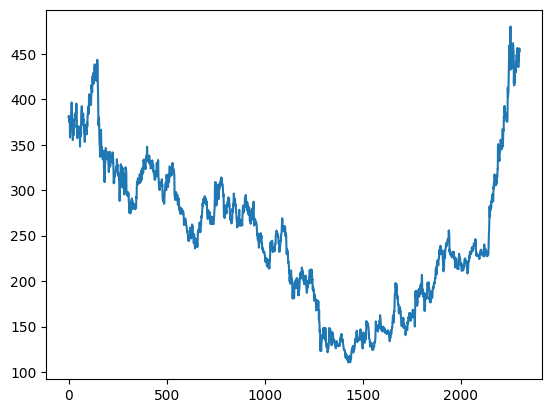

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

0       380.049988
1       381.750000
2       380.250000
3       379.950012
4       374.700012
           ...    
2295    440.950012
2296    443.850006
2297    452.450012
2298    455.799988
2299    453.250000
Name: Close, Length: 2300, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.72946268]
 [0.73406415]
 [0.73000406]
 ...
 [0.92542973]
 [0.93449719]
 [0.92759507]]


In [ ]:

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1495, 805)

In [ ]:
train_data

array([[0.72946268],
       [0.73406415],
       [0.73000406],
       ...,
       [0.07998377],
       [0.08377317],
       [0.07254027]])

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1394, 100)
(1394,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(704, 100)
(704,)


(None, None)

In [ ]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
!pip install tensorflow

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 9s 181ms/step - loss: 0.0444 - val_loss: 0.0096
Epoch 2/100
22/22 [==============================] - 3s 132ms/step - loss: 0.0049 - val_loss: 0.0024
Epoch 3/100
22/22 [==============================] - 3s 128ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 4/100
22/22 [==============================] - 3s 125ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 5/100
22/22 [==============================] - 3s 126ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 6/100
22/22 [==============================] - 3s 131ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 7/100
22/22 [==============================] - 3s 128ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 8/100
22/22 [==============================] - 3s 125ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 9/100
22/22 [==============================] - 3s 129ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 10/100
22/22 [==============================] - 3s 132ms/step - loss: 0.0011 - val_lo

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 [==============================] - 1s 30ms/step


In [ ]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

263.9751694024575

In [ ]:

math.sqrt(mean_squared_error(ytest,test_predict))


247.63353318284936

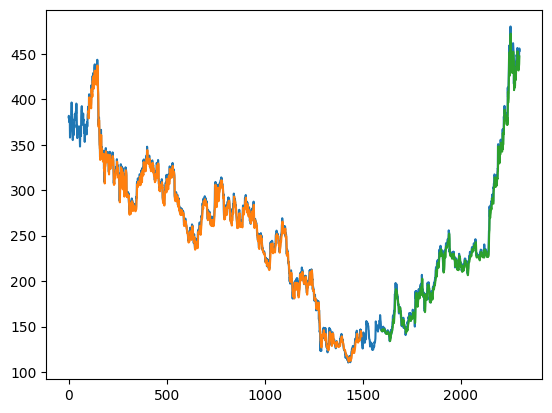

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

805

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 464)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.23805656428402538,
 0.2178914620786358,
 0.22100418073064182,
 0.21518473584163406,
 0.18771143975524818,
 0.19515493690700286,
 0.17945595777348478,
 0.2009744230973753,
 0.18622277336598897,
 0.1802679426034935,
 0.17864393164211134,
 0.1935309259456206,
 0.20530516029575924,
 0.211665983473259,
 0.20313981234724948,
 0.19677898916974967,
 0.1935309259456206,
 0.19461359991987537,
 0.19258355524212412,
 0.20422248632150436,
 0.21450805428238368,
 0.2241169406840125,
 0.22560560707327187,
 0.22438758852689394,
 0.2204628437435145,
 0.224252243954771,
 0.23020707471726626,
 0.237379882724775,
 0.23629720875052013,
 0.23832725342827138,
 0.23426716407276887,
 0.24455269073228364,
 0.2483421322449047,
 0.25145485089691083,
 0.24983083993552851,
 0.2725673238057969,
 0.2766274131612994,
 0.28339422875380366,
 0.27486805762779415,
 0.26146972971354415,
 0.2649884820819192,
 0.28380022116880804,
 0.29584518596455717,
 0.29246177816830504,
 0.30071726015006867,
 0.3041006679463207,
 0.300

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input) > 100):

        x_input = np.array(temp_input[-100:])
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(f"{i} day output {yhat}")
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


print(lst_output)

0 day input [0.62687777 0.63905804 0.66084724 0.66314789 0.65394503 0.65340374
 0.65083232 0.65800512 0.64135877 0.63513334 0.64162946 0.64812559
 0.64176477 0.69400463 0.65394503 0.66301258 0.68398971 0.69156851
 0.69035054 0.7318988  0.71850047 0.73419945 0.76356745 0.74164295
 0.74218433 0.74083096 0.73041005 0.74380838 0.73487613 0.74110165
 0.73230479 0.74191364 0.73447014 0.72838001 0.7175531  0.73812424
 0.71660573 0.73636488 0.75477059 0.81810796 0.79036402 0.80010825
 0.801597   0.83705505 0.89240763 0.91514412 0.92597102 0.94370013
 0.93557995 0.87224249 0.92515904 0.9630532  0.99147383 1.
 0.9485722  0.90932467 0.87264856 0.90567057 0.90228717 0.89795639
 0.89552035 0.87603197 0.88279879 0.90891868 0.93341452 0.94762483
 0.95019625 0.94207608 0.92935443 0.91690347 0.82961155 0.85843825
 0.82473948 0.84260389 0.835025   0.83624306 0.87021244 0.86994184
 0.88076874 0.86317502 0.87576128 0.89727971 0.90039251 0.90661794
 0.91568549 0.91054273 0.91176071 0.89132496 0.93598594 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2300

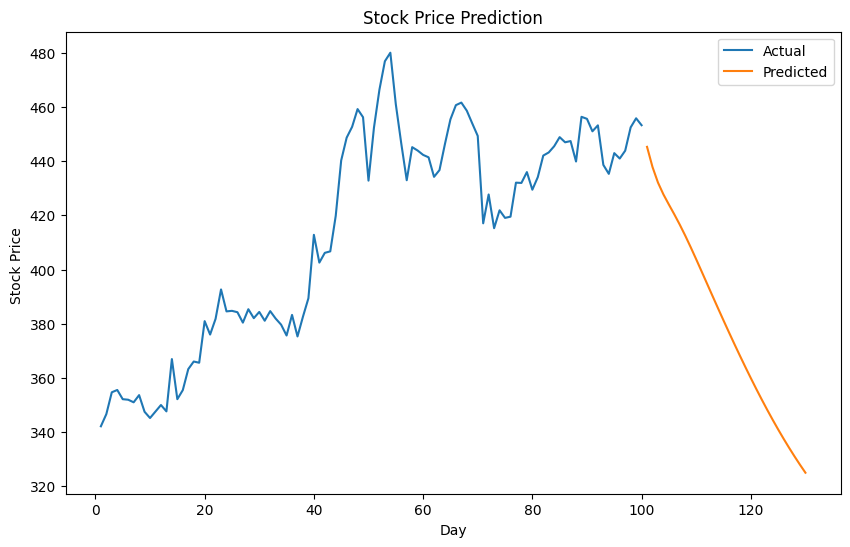

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(day_new, scaler.inverse_transform(df1[-100:]))

plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.legend(['Actual', 'Predicted'])
plt.xlabel('Day')
plt.ylabel('Stock Price ')
plt.title('Stock Price Prediction')
plt.show()


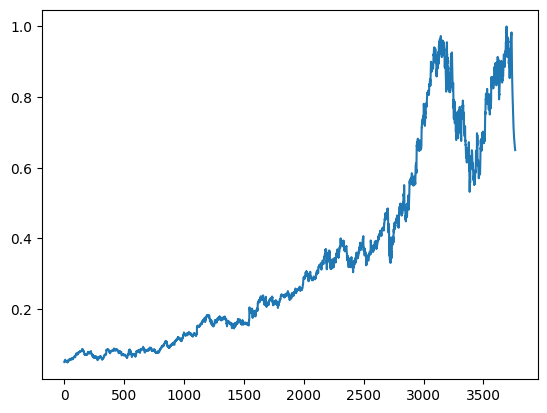

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

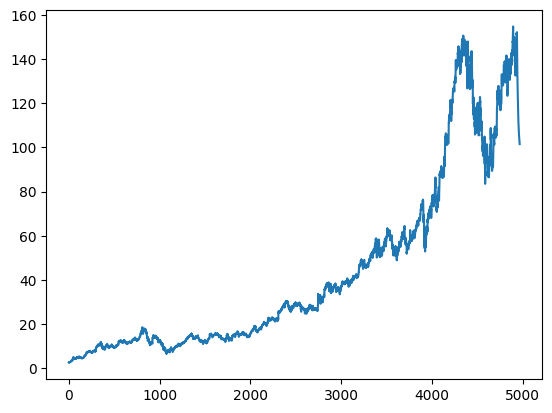

In [ ]:
plt.plot(df3)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Calculate technical indicators
df['SMA'] = df['Close'].rolling(window=20).mean()
df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()

# Generate signals from technical indicators
def generate_signals(df):
    df['SMA_Signal'] = np.where(df['Close'] > df['SMA'], 1, 0)
    df['EMA_Signal'] = np.where(df['Close'] > df['EMA'], 1, 0)

    # Aggregate signals
    df['Total_Signals'] = df[['SMA_Signal', 'EMA_Signal']].sum(axis=1)

    # Interpretation of the aggregated signal
    df['Recommendation'] = np.where(df['Total_Signals'] >= 2, 'Strong Buy',
                                    (np.where(df['Total_Signals'] <= -2, 'Strong Sell', 'Neutral')))

# Generate signals and recommendations
generate_signals(df)
df




,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,SMA_Signal,EMA_Signal,Total_Signals,Recommendation
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN,2.499133,0,0,0,Neutral
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN,2.518038,0,1,1,Neutral
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,NaN,2.537729,0,1,1,Neutral
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,NaN,2.544798,0,1,1,Neutral
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,NaN,2.553875,0,1,1,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300,140.931999,143.893867,1,1,2,Strong Buy
4932,2024-03-25,150.949997,151.455994,148.800003,151.149994,151.149994,15114700,141.551999,144.584927,1,1,2,Strong Buy
4933,2024-03-26,151.240005,153.199997,151.029999,151.699997,151.699997,19312700,142.131998,145.262553,1,1,2,Strong Buy
4934,2024-03-27,152.145004,152.690002,150.130005,151.940002,151.940002,16622000,142.857499,145.898500,1,1,2,Strong Buy


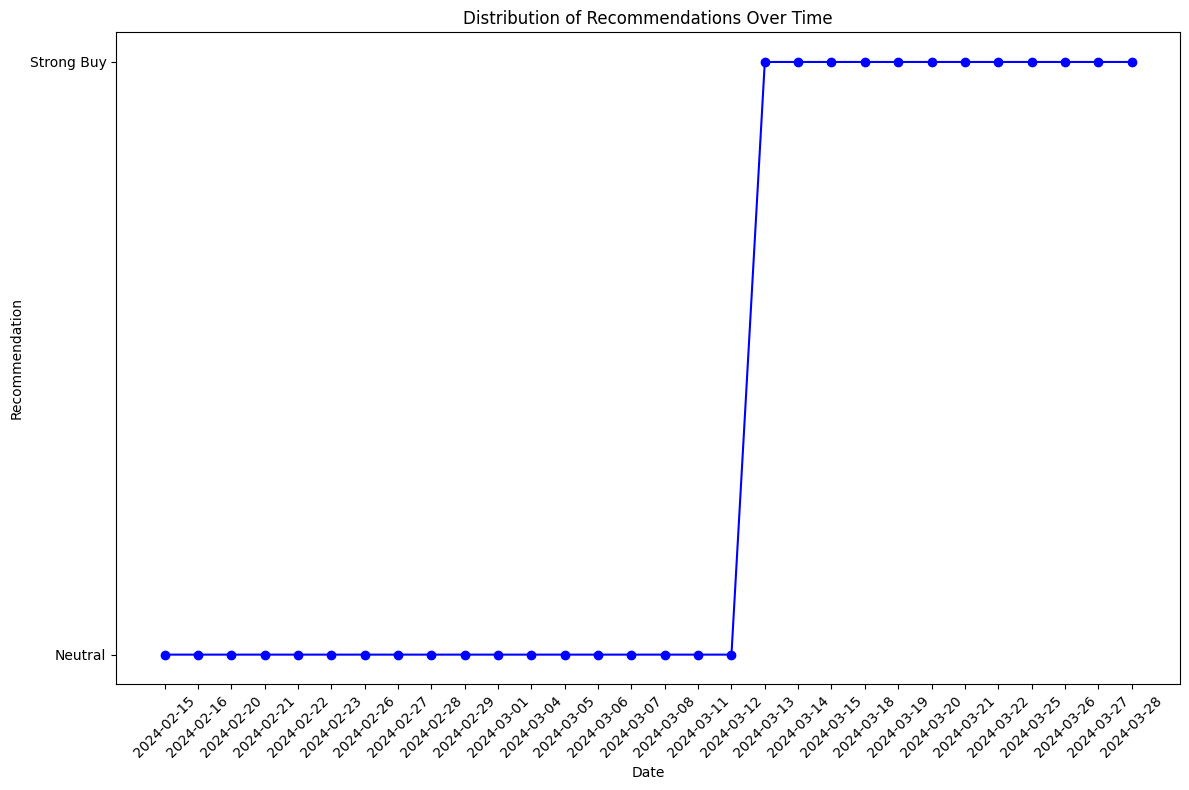

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df['Date'][-30:], df['Recommendation'][-30:], marker='o', color='blue', linestyle='-')
plt.title('Distribution of Recommendations Over Time')
plt.xlabel('Date')
plt.ylabel('Recommendation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae_train = mean_absolute_error(y_train, train_predict)
mae_test = mean_absolute_error(ytest, test_predict)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, train_predict))
rmse_test = np.sqrt(mean_squared_error(ytest, test_predict))

# Calculate MAPE - Avoid division by zero error
mape_train = np.mean(np.abs((y_train - train_predict) / (y_train + np.finfo(float).eps))) * 100
mape_test = np.mean(np.abs((ytest - test_predict) / (ytest + np.finfo(float).eps))) * 100

mae_train, mae_test, rmse_train, rmse_test, mape_train, mape_test

(18.58932312439623,
 90.24256069656306,
 21.08100759694897,
 95.49340454156315,
 26679.84884070894,
 17717.642241621557)

*Web-Scrapping Data

In [ ]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

def get_article(card):
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)

    article = (headline, source, posted, description, clean_link)
    return article

def get_the_news(search):
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    articles = []
    links = set()

    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')


        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)


        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break


    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
        writer.writerows(articles)

    return articles

In [ ]:
company=symbol
articles = get_the_news(company)

In [ ]:
articles

[("Google's former CEO lists $24.5 million mansion in most expensive ZIP code in the US",
  'Business Insider via Yahoo News',
  '42 minutes ago',
  'The property, located in the most expensive US zip code, includes a main home and a guest house....',
  'https://www.yahoo.com/tech/googles-former-ceo-lists-24-091201000.html'),
 ('Google antitrust case wrapping up | Northwest Arkansas Democrat-Gazette',
  'Northwest Arkansas Democrat Gazette',
  '3 hours ago',
  "Google's preeminence as an internet search engine is an illegal monopoly propped up by more than $20...",
  'https://www.nwaonline.com/news/2024/may/04/google-antitrust-case-wrapping-up/'),
 ('Google blasted as ‘negligent’ over evidence destruction as landmark DOJ antitrust case wraps up',
  'NY Post via Yahoo Finance',
  '11 hours ago',
  'A federal judge blasted Friday Google over a “negligent” policy that resulted in the deletion of...',
  'https://finance.yahoo.com/news/google-blasted-negligent-over-evidence-224643776.html?f

In [ ]:
from textblob import TextBlob
# Determine strong buy or sell based on sentiment analysis and other factors
recommendations = []
for headline, source, posted, description, link in articles[0:20]:
    blob = TextBlob(headline)
    sentiment = blob.sentiment.polarity

    if sentiment >= 0.7:
        recommendation = 'Strong Buy'
    elif sentiment <= -0.7:
        recommendation = 'Sell'
    else:
        recommendation = 'Hold'

    recommendations.append((headline, source, posted, description, link, recommendation))

# Display recommendations
for headline, source, posted, description, link, recommendation in recommendations:
    print(f"Headline: {headline}")
    print(f"Source: {source}")
    print(f"Posted: {posted}")
    print(f"Description: {description}")
    print(f"Link: {link}")
    print(f"Recommendation: {recommendation}\n")


Headline: Google's former CEO lists $24.5 million mansion in most expensive ZIP code in the US
Source: Business Insider via Yahoo News
Posted: 42 minutes ago
Description: The property, located in the most expensive US zip code, includes a main home and a guest house....
Link: https://www.yahoo.com/tech/googles-former-ceo-lists-24-091201000.html
Recommendation: Hold

Headline: Google antitrust case wrapping up | Northwest Arkansas Democrat-Gazette
Source: Northwest Arkansas Democrat Gazette
Posted: 3 hours ago
Description: Google's preeminence as an internet search engine is an illegal monopoly propped up by more than $20...
Link: https://www.nwaonline.com/news/2024/may/04/google-antitrust-case-wrapping-up/
Recommendation: Hold

Headline: Google blasted as ‘negligent’ over evidence destruction as landmark DOJ antitrust case wraps up
Source: NY Post via Yahoo Finance
Posted: 11 hours ago
Description: A federal judge blasted Friday Google over a “negligent” policy that resulted in the del

In [ ]:
type(articles)

list

In [ ]:
plot_article = [articles[i][0] for i in range(30)]

In [ ]:
plot_article

["Google's former CEO lists $24.5 million mansion in most expensive ZIP code in the US",
 'Google antitrust case wrapping up | Northwest Arkansas Democrat-Gazette',
 'Google blasted as ‘negligent’ over evidence destruction as landmark DOJ antitrust case wraps up',
 'Is Google maintaining illegal monopoly? Bay Area attorneys discuss DOJ antitrust case',
 "Funny or Annoying? How Google's New 'Audio Emoji' Feature Works on Android",
 'Google’s empire is massive. A judge will soon rule if it’s a monopoly.',
 'Google antitrust case in judge’s hands as landmark trial comes to close',
 'Google, Justice Department make final arguments about whether search engine is a monopoly - The...',
 'Google, Justice Department make final arguments about whether search engine is a monopoly',
 'Google, Justice Department make final arguments about whether search engine is a monopoly',
 'Google, Justice Department make final arguments about whether search engine is a monopoly',
 'Google blasted as ‘negligent

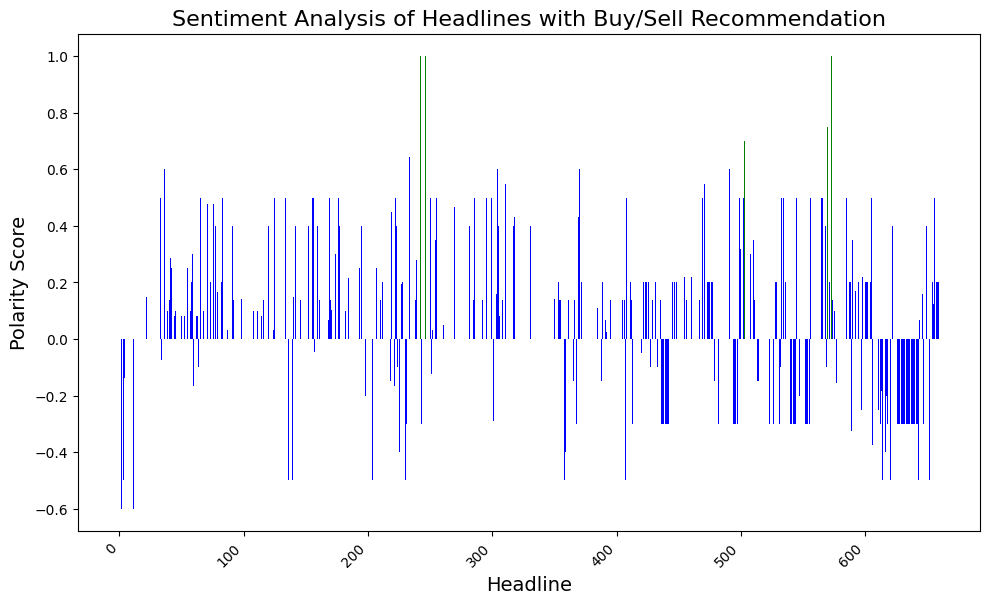

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob
polarity_scores = [TextBlob(headline).sentiment.polarity for headline, _, _, _, _ in articles]
strong_buy_threshold = 0.7
sell_threshold = -0.7
labels = ['Strong Buy' if score >= strong_buy_threshold else 'Sell' if score <= sell_threshold else 'Hold' for score in polarity_scores]
plt.figure(figsize=(10, 6))
plt.bar(range(len(articles)), polarity_scores, color=['green' if label == 'Strong Buy' else 'red' if label == 'Sell' else 'blue' for label in labels])
# plt.xticks(range(len(articles)), [headline[:20] + '...' for headline, _, _, _, _ in articles], rotation=45, ha='left')
plt.xlabel('Headline', fontsize=14)
plt.ylabel('Polarity Score', fontsize=14)
plt.title('Sentiment Analysis of Headlines with Buy/Sell Recommendation', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()